In [1]:
# End to End ML IITM: https://colab.research.google.com/drive/1leWpYtJrBhLf426Q2Emj1o3nNylPaJ0O?usp=sharing
# heart - https://media.licdn.com/dms/document/media/D4D1FAQFRlrkzgq8vMg/feedshare-document-pdf-analyzed/0/1696704666094?e=1698883200&v=beta&t=u-Ut36lewfXkDpX04b6MTvxFsTzVb4qkLu5AxKN4GcM
# taxi - https://media.licdn.com/dms/document/media/C4D1FAQEzUwZsEB0JLA/feedshare-document-pdf-analyzed/0/1679913090300?e=1698883200&v=beta&t=cuW5AsFBS9cZ-Va3hKcNItzeuI9Xq1xx5tx8ROQKkWY

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Perceptron, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, VotingRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.decomposition import PCA

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import GridSearchCV

import pickle

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


## LOAD MODEL

In [2]:
# with open('model.pkl','rb') as file:
#     dr = pickle.load(file)

## READ DATA

In [3]:
sample = pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv")
sample

,ID,total_amount
0,1,24.456348
1,2,24.374058
2,3,19.878154
3,4,25.015569
4,5,22.252489
...,...,...
995,996,24.438531
996,997,26.773706
997,998,22.192718
998,999,142.698686


In [4]:
data = pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv")
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


In [5]:
data[data['passenger_count'] == 0].head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
10,0,2023-06-29 08:48:20,2023-06-29 09:46:15,0.0,8.9,1.0,N,40,153,Credit Card,9.25,14.743844,6.55,1.0,74.40,2.5,1.75
11,0,2023-06-30 11:52:56,2023-06-30 12:24:52,0.0,8.2,1.0,N,215,125,Credit Card,7.50,10.487979,0.00,1.0,62.25,2.5,0.00
28,0,2023-06-30 16:53:27,2023-06-30 18:41:57,0.0,1.3,1.0,N,239,47,Credit Card,5.00,3.900522,0.00,1.0,17.50,2.5,0.00
61,0,2023-06-30 13:06:03,2023-06-30 14:33:47,0.0,2.1,1.0,N,159,30,Credit Card,2.50,5.670109,0.00,1.0,21.80,2.5,0.00
201,0,2023-06-28 17:46:53,2023-06-28 19:00:32,0.0,1.2,1.0,N,248,175,Credit Card,5.00,4.102976,0.00,1.0,17.10,2.5,0.00


In [6]:
data[data['trip_distance'] == 1].head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
101,1,2023-06-29 02:34:25,2023-06-29 01:37:44,1.0,1.0,1.0,N,113,179,Cash,1.0,1.329015,0.0,1.0,14.30,2.5,0.0
108,1,2023-06-30 13:07:44,2023-06-30 13:08:35,1.0,1.0,1.0,N,214,154,Credit Card,0.0,5.013024,0.0,1.0,12.90,2.5,0.0
144,1,2023-06-29 20:34:23,2023-06-29 20:57:08,3.0,1.0,1.0,N,110,223,Credit Card,1.0,4.018693,0.0,1.0,15.48,2.5,0.0
377,0,2023-06-30 13:51:44,2023-06-30 14:57:41,3.0,1.0,1.0,N,75,10,Cash,2.5,3.909787,0.0,1.0,12.60,2.5,0.0
379,0,2023-06-29 21:26:33,2023-06-29 20:45:42,1.0,1.0,1.0,N,84,61,Credit Card,3.5,5.836697,0.0,1.0,14.60,2.5,0.0


In [7]:
data[data['tpep_pickup_datetime'] == data['tpep_dropoff_datetime']].head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
4587,1,2023-06-30 13:40:37,2023-06-30 13:40:37,1.0,2.49,1.0,N,107,220,Credit Card,0.0,5.805599,0.0,1.0,28.18,2.5,0.0
6527,1,2023-06-29 21:32:47,2023-06-29 21:32:47,1.0,1.06,1.0,N,135,124,Cash,1.0,3.391975,0.0,1.0,13.60,2.5,0.0
11135,1,2023-06-29 14:23:57,2023-06-29 14:23:57,1.0,2.63,1.0,N,187,86,Credit Card,0.0,7.779255,0.0,1.0,32.37,2.5,0.0
21264,1,2023-06-28 17:58:24,2023-06-28 17:58:24,1.0,0.78,1.0,N,252,237,Credit Card,2.5,4.158586,0.0,1.0,21.48,2.5,0.0
50952,0,2023-06-30 15:43:05,2023-06-30 15:43:05,2.0,0.80,1.0,N,85,245,Credit Card,2.5,4.591682,0.0,1.0,14.25,2.5,0.0


In [8]:
data.shape

(175000, 17)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amount           175000 non-nu

### FEATURE ENGINEERING

In [10]:
data= data.replace(np.nan,method='ffill')
                                ########################
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

data['RatecodeID'] = data['RatecodeID'].apply(lambda x: 1 if x == 99 else x)
data['duration'] = abs((data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']))
data['duration'] = data['duration'].dt.total_seconds().div(60).astype(float)
data['misc'] = data['tip_amount'] + data['tolls_amount'] + data['extra'] + data['Airport_fee'] + data['improvement_surcharge'] + data['congestion_surcharge']
data['locdiff'] = (data['DOLocationID'] - (data['PULocationID']))
                                ########################
data['week'] = data['tpep_pickup_datetime'].dt.dayofweek
conditions = [
    (data['week'] == 2),  # Tuesday
    (data['week'] == 3),  # Wednesday
    (data['week'] == 4),  # Thursday
    (data['week'] == 5)   # Friday
]
values = [1, 2, 3, 4]
data['week'] = np.select(conditions, values, default=5)
                                ########################
data['day'] = data['tpep_pickup_datetime'].dt.day
conditions = [
    (data['day'] == 1),
    (data['day'] == 28),
    (data['day'] == 29),
    (data['day'] == 30)
]
values = [1, 2, 3, 4]
data['day'] = np.select(conditions, values, default=5)
                                ########################
data['pickup_hour'] = data['tpep_pickup_datetime'].dt.hour
conditions = [
    (data['pickup_hour'] >= 6) & (data['pickup_hour'] < 12),
    (data['pickup_hour'] >= 12) & (data['pickup_hour'] < 18),
    (data['pickup_hour'] >= 18) & (data['pickup_hour'] < 24),
    (data['pickup_hour'] >= 0) & (data['pickup_hour'] < 6)
]
values = [1, 2, 3, 4]
data['day_shift'] = np.select(conditions, values, default=5)
                                ########################
data['speed'] = data.apply(lambda row: 0 if row['duration'] == 0 else row['trip_distance'] / row['duration'], axis=1)

                                ########################
data['passn_check'] = data['passenger_count'].apply(lambda x: 0 if x == 0 else 1)
data['tripd_check'] = data['trip_distance'].apply(lambda x: 0 if x == 0 else 1)
data['sp_check'] = data['speed'].apply(lambda x: 0 if x == 0 else 1)
data['dur_check'] = data['duration'].apply(lambda x: 0 if x == 0 else 1)
data['ext_check'] = data['extra'].apply(lambda x: -1 if x < 0 else 0 if x == 0 else 1)
data['tip_check'] = data['tip_amount'].apply(lambda x: -1 if x < 0 else 0 if x == 0 else 1)
data['tolls_check'] = data['tolls_amount'].apply(lambda x: -1 if x < 0 else 0 if x == 0 else 1)
data['airp_check'] = data['Airport_fee'].apply(lambda x: -1 if x < 0 else 0 if x == 0 else 1)
data['misc_check'] = data['misc'].apply(lambda x: -1 if x < 0 else 0 if x == 0 else 1)
data['loc_check'] = data['locdiff'].apply(lambda x: -1 if x < 0 else 0 if x == 0 else 1)
                                ########################
# data['total_amount'] = data['total_amount']/1000
                                ########################
data= data.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'],axis=1) # no use now
# data= data.drop(['extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'Airport_fee'],axis=1) # misc takes of it


## EDA

In [11]:
# fig,axes = plt.subplots(23,2,figsize=(20, 60),dpi=300)

# for ind,col in enumerate(data.columns):
#     if data[col].nunique()!=2:
#         plt.subplot(23,2,2*ind+1)
#         sns.histplot(data[col],bins=15,kde=True)
#         plt.gca().set_title(col)
#     elif col!="smoking":
#         plt.subplot(23,2,2*ind+1)
#         sns.countplot(data = data,x=col,hue="smoking")
#         plt.gca().set_title(col)
#     else:
#         plt.subplot(23,2,2*ind+1)
#         sns.countplot(data = data,x=col)
#         plt.gca().set_title(col)
    
#     if data[col].nunique()!=2:
#         plt.subplot(23,2,2*ind+2)
#         sns.boxplot(data[col],orient="h",palette="BuGn")
#         plt.gca().set_title(col)
#     else:
#         plt.subplot(23,2,2*ind+2)
#         sns.histplot(binwidth=0.5, x="dental caries", hue="smoking", data=data, stat="count", multiple="stack",palette="BuGn")
#         plt.gca().set_title(col)

# fig.tight_layout();
# plt.show()

In [12]:
print(data['VendorID'].value_counts())
print(" ")
print(data['passenger_count'].value_counts())
print(" ")
print(data['trip_distance'].value_counts())
print(" ")
print(data['RatecodeID'].value_counts())
print(" ")
print(data['PULocationID'].value_counts())
print(" ")
print(data['DOLocationID'].value_counts())
print(" ")
print(data['store_and_fwd_flag'].value_counts())
print(" ")
print(data['payment_type'].value_counts())
print(" ")
print(data['extra'].value_counts())
print(" ")
print(data['tip_amount'].value_counts())
print(" ")
print(data['tolls_amount'].value_counts())
print(" ")
print(data['payment_type'].value_counts())
print(" ")
print(data['improvement_surcharge'].value_counts())
print(" ")
print(data['congestion_surcharge'].value_counts())
print(" ")
print(data['Airport_fee'].value_counts())
print(" ")
print(data['misc'].value_counts())
print(" ")
print(data['duration'].value_counts())
print(" ")
print(data['locdiff'].value_counts())
print(" ")
print(data['week'].value_counts())
print(" ")
print(data['day'].value_counts())
print(" ")
print(data['pickup_hour'].value_counts())
print(" ")
print(data['day_shift'].value_counts())
print(" ")
print(data['speed'].value_counts())
print(" ")
print(data['passn_check'].value_counts())
print(" ")
print(data['tripd_check'].value_counts())
print(" ")
print(data['sp_check'].value_counts())
print(" ")
print(data['dur_check'].value_counts())
print(" ")
print(data['loc_check'].value_counts())
print(" ")
print(data['total_amount'].value_counts())

VendorID
1    127340
0     47597
2        63
Name: count, dtype: int64
 
passenger_count
1.0    133177
2.0     25194
3.0      6212
4.0      3796
0.0      2911
5.0      2052
6.0      1655
8.0         2
9.0         1
Name: count, dtype: int64
 
trip_distance
0.00     2632
1.00     2431
0.90     2383
1.20     2363
1.10     2297
         ... 
31.42       1
26.80       1
27.53       1
13.29       1
15.17       1
Name: count, Length: 2929, dtype: int64
 
RatecodeID
1.0    165134
2.0      7594
5.0      1066
3.0       751
4.0       455
Name: count, dtype: int64
 
PULocationID
264    730
85     725
43     719
162    718
97     717
      ... 
254    613
94     613
153    611
179    606
252    606
Name: count, Length: 264, dtype: int64
 
DOLocationID
263    759
127    736
37     729
115    726
254    721
      ... 
9      611
140    610
195    607
187    606
183    605
Name: count, Length: 264, dtype: int64
 
store_and_fwd_flag
N    173768
Y      1232
Name: count, dtype: int64
 
payment_type
Cred

In [13]:
print(175000/8)

21875.0


In [14]:
data.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,...,passn_check,tripd_check,sp_check,dur_check,ext_check,tip_check,tolls_check,airp_check,misc_check,loc_check
0,1,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,...,1,1,1,1,1,1,0,0,1,-1
1,0,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,...,1,1,1,1,1,1,0,0,1,1
2,1,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,...,1,1,1,1,0,1,0,0,1,1
3,0,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,...,1,1,1,1,1,1,0,0,1,1
4,1,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,...,1,1,1,1,1,1,0,0,1,-1


In [15]:
data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,...,passn_check,tripd_check,sp_check,dur_check,ext_check,tip_check,tolls_check,airp_check,misc_check,loc_check
count,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,...,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.0,175000.000000,175000.000000,175000.000000,175000.000000
mean,0.728377,1.357714,5.145930,1.084143,132.710349,132.701429,1.932143,6.127497,0.646816,0.979689,...,0.983366,0.984960,0.984851,0.999891,0.694531,1.0,0.088114,0.090806,0.983566,0.002549
std,0.445606,0.891528,394.971052,0.417545,76.148799,76.192493,1.948497,4.610834,2.328274,0.198775,...,0.127897,0.121712,0.122144,0.010419,0.474117,0.0,0.285991,0.292654,0.180551,0.998158
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000079,-29.300000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,1.0,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,1.000000,1.080000,1.000000,67.000000,67.000000,0.000000,3.473321,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.0,0.000000,0.000000,1.000000,-1.000000
50%,1.000000,1.000000,1.840000,1.000000,133.000000,133.000000,1.000000,5.286217,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,3.610000,1.000000,199.000000,199.000000,2.500000,7.502746,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.000000,0.000000,1.000000,1.000000
max,2.000000,9.000000,135182.060000,5.000000,264.000000,264.000000,11.750000,484.876151,80.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000


In [16]:
(data.isnull().sum())

VendorID                 0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
extra                    0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
duration                 0
misc                     0
locdiff                  0
week                     0
day                      0
pickup_hour              0
day_shift                0
speed                    0
passn_check              0
tripd_check              0
sp_check                 0
dur_check                0
ext_check                0
tip_check                0
tolls_check              0
airp_check               0
misc_check               0
loc_check                0
dtype: int64

In [17]:
sns.set()

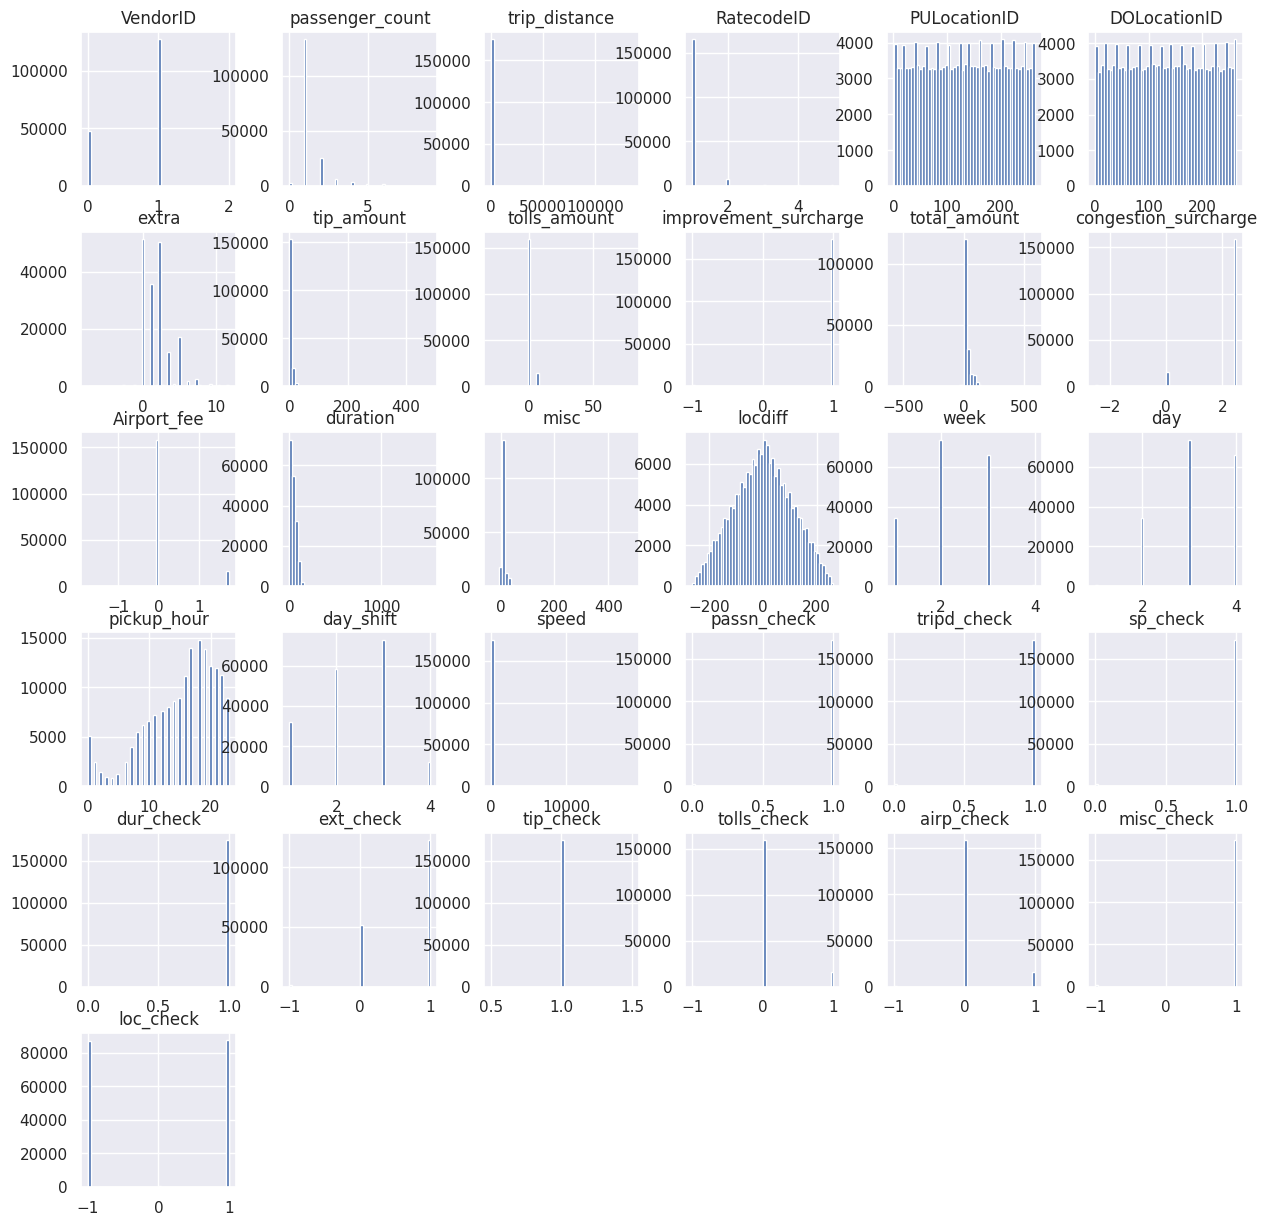

In [18]:
data.hist(bins=50,figsize=(15,15))
plt.show()

In [19]:
cat_col = data.select_dtypes(include=['object'])

num_col = data.select_dtypes(exclude=['object'])

In [20]:
cat_col.head()

,store_and_fwd_flag,payment_type
0,N,Credit Card
1,N,Credit Card
2,N,Credit Card
3,N,Credit Card
4,N,Credit Card


In [21]:
num_col.head()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,...,passn_check,tripd_check,sp_check,dur_check,ext_check,tip_check,tolls_check,airp_check,misc_check,loc_check
0,1,1.0,2.14,1.0,120,9,2.5,7.165589,0.0,1.0,...,1,1,1,1,1,1,0,0,1,-1
1,0,1.0,2.70,1.0,15,215,3.5,6.067401,0.0,1.0,...,1,1,1,1,1,1,0,0,1,1
2,1,1.0,1.15,1.0,167,223,0.0,4.111547,0.0,1.0,...,1,1,1,1,0,1,0,0,1,1
3,0,1.0,0.40,1.0,128,239,2.5,6.411079,0.0,1.0,...,1,1,1,1,1,1,0,0,1,1
4,1,3.0,1.10,1.0,203,52,1.0,4.769377,0.0,1.0,...,1,1,1,1,1,1,0,0,1,-1


<Axes: xlabel='locdiff', ylabel='misc'>

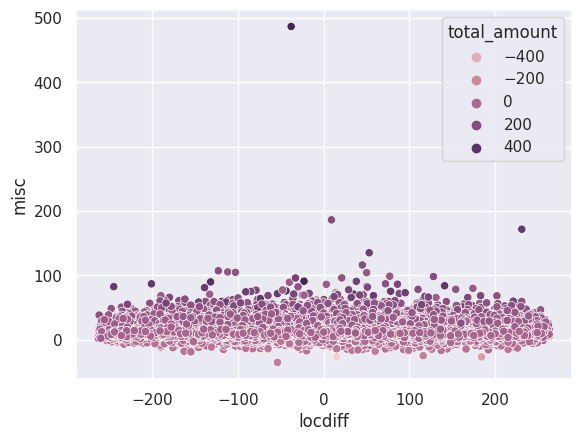

In [22]:
exploration_set = num_col.copy()
sns.scatterplot(x='locdiff', y='misc', hue='total_amount',
                data=exploration_set)

<Axes: xlabel='locdiff', ylabel='duration'>

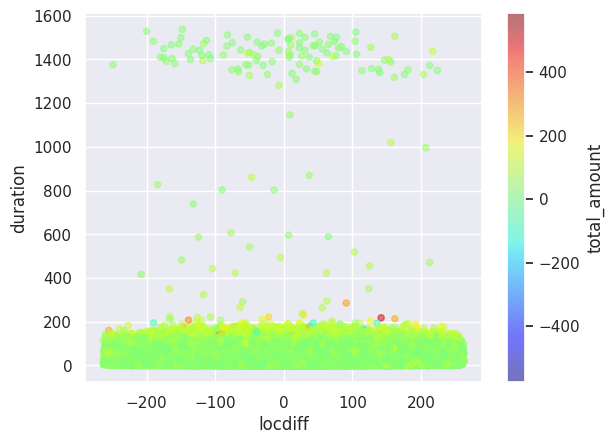

In [23]:
exploration_set.plot(kind='scatter', x='locdiff', y='duration', alpha=0.5,
                     c="total_amount", cmap=plt.get_cmap("jet"))

In [24]:
corr_matrix = exploration_set.corr()

In [25]:
corr_matrix['total_amount']

VendorID                 0.039695
passenger_count          0.051723
trip_distance            0.009911
RatecodeID               0.518464
PULocationID             0.000715
DOLocationID            -0.002954
extra                    0.234346
tip_amount               0.638658
tolls_amount             0.684765
improvement_surcharge    0.224036
total_amount             1.000000
congestion_surcharge    -0.142961
Airport_fee              0.578558
duration                 0.107297
misc                     0.755860
locdiff                 -0.002594
week                    -0.005726
day                     -0.006011
pickup_hour             -0.003887
day_shift                0.017985
speed                    0.005776
passn_check              0.013250
tripd_check             -0.011543
sp_check                -0.011205
dur_check                0.003476
ext_check                0.033006
tip_check                     NaN
tolls_check              0.677018
airp_check               0.578558
misc_check    

<Axes: >

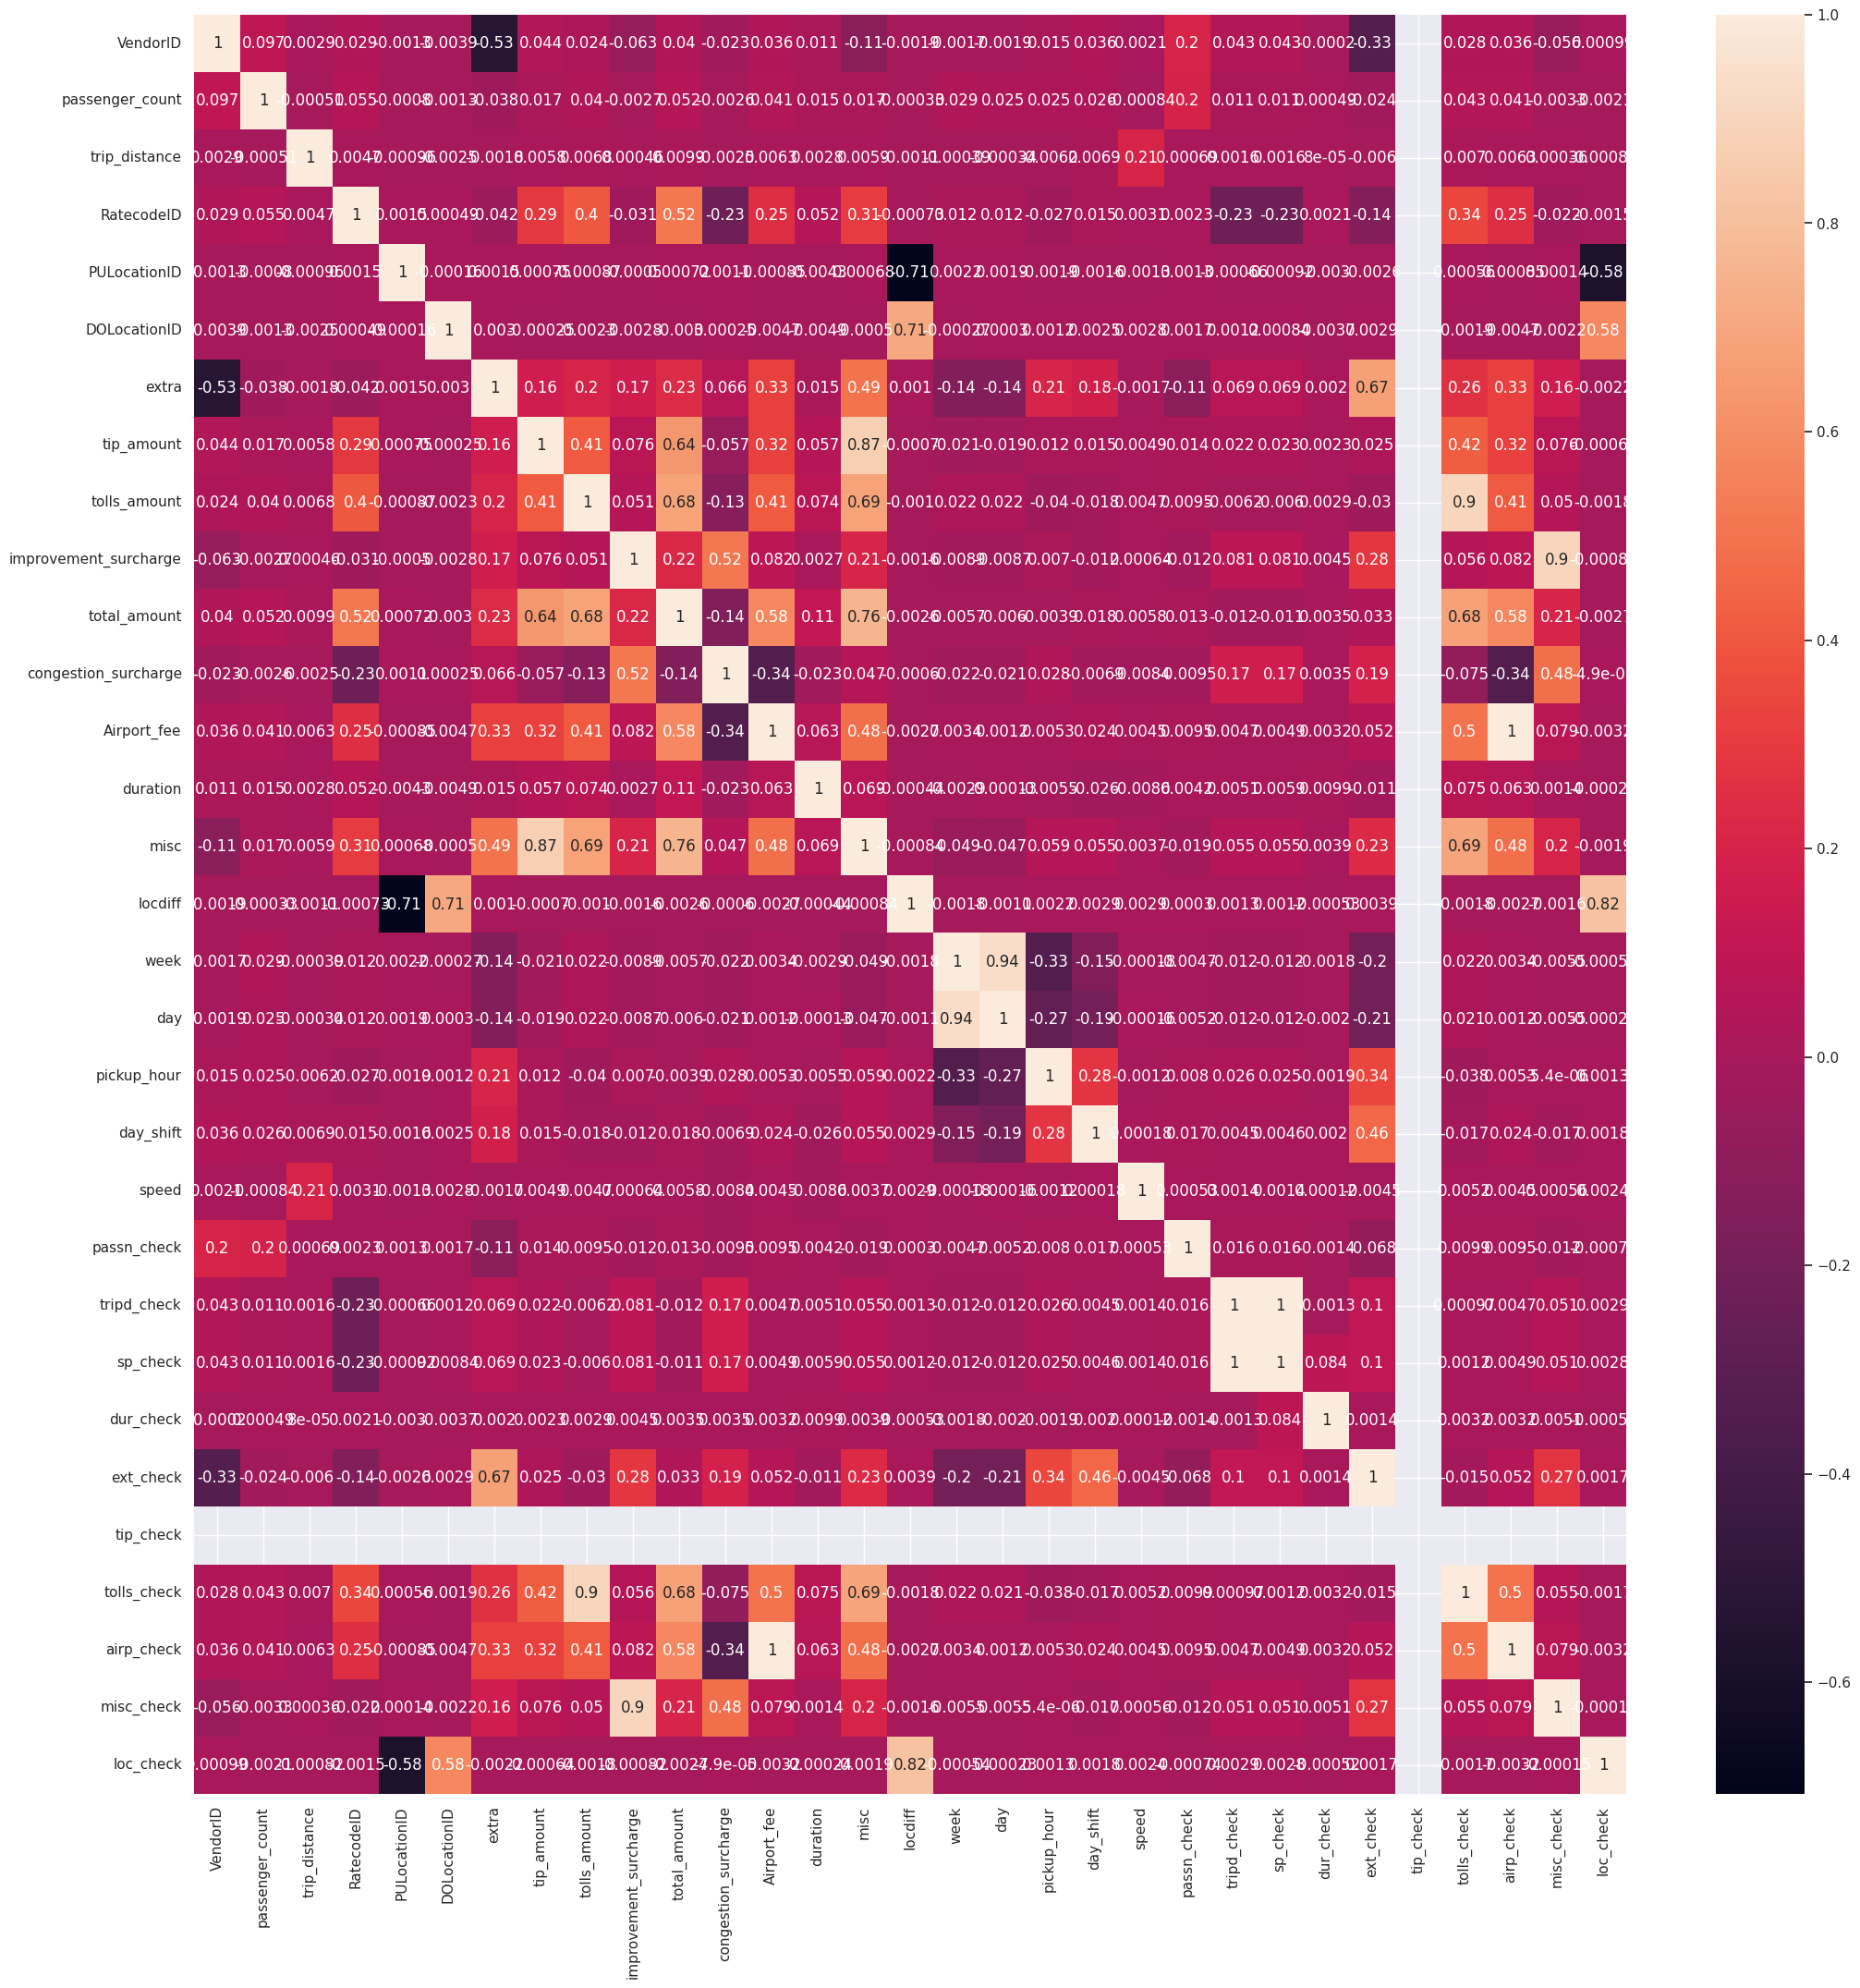

In [26]:
plt.figure(figsize=(25,25))
sns.heatmap(corr_matrix, annot=True)

In [27]:
num_col_names = num_col.columns.tolist()
print(num_col_names)

['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee', 'duration', 'misc', 'locdiff', 'week', 'day', 'pickup_hour', 'day_shift', 'speed', 'passn_check', 'tripd_check', 'sp_check', 'dur_check', 'ext_check', 'tip_check', 'tolls_check', 'airp_check', 'misc_check', 'loc_check']


In [28]:
cat_col_names = cat_col.columns.tolist()
print(cat_col_names)

['store_and_fwd_flag', 'payment_type']


In [29]:
# attribute_list = num_col_names
# scatter_matrix(exploration_set[attribute_list]);

In [30]:
data

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,...,passn_check,tripd_check,sp_check,dur_check,ext_check,tip_check,tolls_check,airp_check,misc_check,loc_check
0,1,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,...,1,1,1,1,1,1,0,0,1,-1
1,0,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,...,1,1,1,1,1,1,0,0,1,1
2,1,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,...,1,1,1,1,0,1,0,0,1,1
3,0,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,...,1,1,1,1,1,1,0,0,1,1
4,1,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,...,1,1,1,1,1,1,0,0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174995,1,3.0,3.45,1.0,N,147,167,Credit Card,1.0,8.732495,...,1,1,1,1,1,1,0,0,1,1
174996,1,1.0,9.44,1.0,N,154,191,Cash,5.0,0.283275,...,1,1,1,1,1,1,0,1,1,1
174997,0,1.0,2.40,1.0,N,168,106,Credit Card,2.5,4.245354,...,1,1,1,1,1,1,0,0,1,-1
174998,1,1.0,4.71,1.0,N,240,100,Credit Card,2.5,10.479776,...,1,1,1,1,1,1,0,0,1,-1


In [31]:
data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,...,passn_check,tripd_check,sp_check,dur_check,ext_check,tip_check,tolls_check,airp_check,misc_check,loc_check
count,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,...,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.0,175000.000000,175000.000000,175000.000000,175000.000000
mean,0.728377,1.357714,5.145930,1.084143,132.710349,132.701429,1.932143,6.127497,0.646816,0.979689,...,0.983366,0.984960,0.984851,0.999891,0.694531,1.0,0.088114,0.090806,0.983566,0.002549
std,0.445606,0.891528,394.971052,0.417545,76.148799,76.192493,1.948497,4.610834,2.328274,0.198775,...,0.127897,0.121712,0.122144,0.010419,0.474117,0.0,0.285991,0.292654,0.180551,0.998158
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000079,-29.300000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,1.0,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,1.000000,1.080000,1.000000,67.000000,67.000000,0.000000,3.473321,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.0,0.000000,0.000000,1.000000,-1.000000
50%,1.000000,1.000000,1.840000,1.000000,133.000000,133.000000,1.000000,5.286217,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,3.610000,1.000000,199.000000,199.000000,2.500000,7.502746,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.000000,0.000000,1.000000,1.000000
max,2.000000,9.000000,135182.060000,5.000000,264.000000,264.000000,11.750000,484.876151,80.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000


## TRAIN-TEST SPLIT [PREPROCESSING]

In [35]:
features =  data.drop('total_amount', axis=1) # X
label = data['total_amount'] # y
features.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,...,passn_check,tripd_check,sp_check,dur_check,ext_check,tip_check,tolls_check,airp_check,misc_check,loc_check
0,1,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,...,1,1,1,1,1,1,0,0,1,-1
1,0,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,...,1,1,1,1,1,1,0,0,1,1
2,1,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,...,1,1,1,1,0,1,0,0,1,1
3,0,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,...,1,1,1,1,1,1,0,0,1,1
4,1,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,...,1,1,1,1,1,1,0,0,1,-1


In [36]:
# features = pd.get_dummies(features, columns= ['PULocationID', 'DOLocationID','week','day','pickup_hour','day_shift','passenger_count'])
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(features.head(11))

In [37]:
cat_col.head()

,store_and_fwd_flag,payment_type
0,N,Credit Card
1,N,Credit Card
2,N,Credit Card
3,N,Credit Card
4,N,Credit Card


In [38]:
features

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,...,passn_check,tripd_check,sp_check,dur_check,ext_check,tip_check,tolls_check,airp_check,misc_check,loc_check
0,1,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,...,1,1,1,1,1,1,0,0,1,-1
1,0,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,...,1,1,1,1,1,1,0,0,1,1
2,1,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,...,1,1,1,1,0,1,0,0,1,1
3,0,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,...,1,1,1,1,1,1,0,0,1,1
4,1,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,...,1,1,1,1,1,1,0,0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174995,1,3.0,3.45,1.0,N,147,167,Credit Card,1.0,8.732495,...,1,1,1,1,1,1,0,0,1,1
174996,1,1.0,9.44,1.0,N,154,191,Cash,5.0,0.283275,...,1,1,1,1,1,1,0,1,1,1
174997,0,1.0,2.40,1.0,N,168,106,Credit Card,2.5,4.245354,...,1,1,1,1,1,1,0,0,1,-1
174998,1,1.0,4.71,1.0,N,240,100,Credit Card,2.5,10.479776,...,1,1,1,1,1,1,0,0,1,-1


In [39]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   passenger_count        175000 non-null  float64
 2   trip_distance          175000 non-null  float64
 3   RatecodeID             175000 non-null  float64
 4   store_and_fwd_flag     175000 non-null  object 
 5   PULocationID           175000 non-null  int64  
 6   DOLocationID           175000 non-null  int64  
 7   payment_type           175000 non-null  object 
 8   extra                  175000 non-null  float64
 9   tip_amount             175000 non-null  float64
 10  tolls_amount           175000 non-null  float64
 11  improvement_surcharge  175000 non-null  float64
 12  congestion_surcharge   175000 non-null  float64
 13  Airport_fee            175000 non-null  float64
 14  duration               175000 non-nu

In [40]:
label

0         20.64
1         25.55
2         17.64
3         12.80
4         18.00
          ...  
174995    28.08
174996    59.95
174997    33.50
174998    40.80
174999    16.32
Name: total_amount, Length: 175000, dtype: float64

X_windows has a shape of (69997, 8, 32). This means it contains 69,997 windows, each with 8 rows and 32 features per row.
y_windows has a shape of (69997, 8), indicating that it corresponds to the same 69,997 windows, but with 8 target values per window.

Step Size (Stride): The step size defines how much you shift the window at each step. A larger step size results in fewer windows and less overlap, while a smaller step size leads to more windows and more overlap. If the step size is too small, you might have many almost identical windows.

Window Size: The window size determines how many data points (rows) are included in each window. A larger window size includes more data in each window, and a smaller window size includes less data.

Number of Windows: The number of windows created is determined by the step size and the length of the original data. If the step size is larger, you'll have fewer windows; if the window size is larger, you'll have shorter windows. The total number of windows is given by (len(original_data) - window_size) // step_size + 1.

Window Shape: The shape of each window is determined by the window size and the number of features (columns) in your data. Each window has a shape of (window_size, num_features).

Overall Shape: The overall shape of the dataset is determined by the number of windows, the window shape, and the number of features. It is given by (number of windows, window_size, num_features).

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val  = train_test_split(features,label,test_size = 0.2, random_state=42)


In [42]:
X_train

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,...,passn_check,tripd_check,sp_check,dur_check,ext_check,tip_check,tolls_check,airp_check,misc_check,loc_check
143961,1,1.0,7.79,1.0,N,181,174,Credit Card,1.0,7.956385,...,1,1,1,1,1,1,0,1,1,-1
170292,1,1.0,0.79,1.0,N,250,226,Credit Card,2.5,2.276785,...,1,1,1,1,1,1,0,0,1,-1
161029,1,1.0,0.29,2.0,N,236,251,unknown,0.0,1.062698,...,1,1,1,1,0,1,0,0,-1,1
84006,0,1.0,0.60,1.0,N,83,166,Credit Card,3.5,2.444217,...,1,1,1,1,1,1,0,0,1,1
95628,0,1.0,1.90,1.0,N,70,35,Credit Card,5.0,5.163920,...,1,1,1,1,1,1,0,0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,1,1.0,1.49,1.0,N,101,202,Credit Card,0.0,3.260969,...,1,1,1,1,0,1,0,0,1,1
103694,0,1.0,1.60,1.0,N,221,41,Credit Card,2.5,3.382305,...,1,1,1,1,1,1,0,0,1,-1
131932,0,1.0,1.80,1.0,N,18,128,Credit Card,2.5,6.751209,...,1,1,1,1,1,1,0,0,1,1
146867,1,1.0,0.60,1.0,N,84,226,Cash,2.5,1.815167,...,1,1,1,1,1,1,0,0,1,1


In [43]:
X_train.shape, y_train.shape

((140000, 32), (140000,))

In [44]:
X_val.shape, y_val.shape

((35000, 32), (35000,))

In [45]:
X_train.isnull().sum()

VendorID                 0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
extra                    0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
congestion_surcharge     0
Airport_fee              0
duration                 0
misc                     0
locdiff                  0
week                     0
day                      0
pickup_hour              0
day_shift                0
speed                    0
passn_check              0
tripd_check              0
sp_check                 0
dur_check                0
ext_check                0
tip_check                0
tolls_check              0
airp_check               0
misc_check               0
loc_check                0
dtype: int64

## ORDINAL ENCODER

In [46]:
oe = OrdinalEncoder() # Ordinal Encoder
# oe = OneHotEncoder(sparse=False, handle_unknown='ignore') # One Hot Encoder
oe.fit(X_train[['store_and_fwd_flag','payment_type']])
X_train[['store_and_fwd_flag','payment_type']]= oe.transform(X_train[['store_and_fwd_flag','payment_type']])
X_val[['store_and_fwd_flag','payment_type']]= oe.transform(X_val[['store_and_fwd_flag','payment_type']])

## FEATURE REDUCTION - PCA

In [ ]:
# randomforest_train=[]
# randomforest_test=[]
# randomforest_eval=[]

# xgboost_train=[]
# xgboost_test=[]
# xgboost_eval = []

# gradientboost_train=[]
# gradientboost_test=[]
# gradientboost_eval = []

# decisiontree_train=[]
# decisiontree_test=[]
# decisiontree_eval=[]

# linearreg_train=[]
# linearreg_test=[]
# linearreg_eval=[]

# svr_train=[]
# svr_test=[]
# svr_eval=[]

# knn_train=[]
# knn_test=[]
# knn_eval=[]

# ada_train=[]
# ada_test=[]
# ada_eval=[]

# bag_train=[]
# bag_test=[]
# bag_eval=[]

# mlp_train=[]
# mlp_test=[]
# mlp_eval=[]


In [ ]:
# # Varing the number of features from 14 to 32
# for i in range(14,32):
#     # print("If model has " + str(i) + " best features then: ")
#     n_components = i
#     pca = PCA(n_components=n_components)
#     X_train_pca = pca.fit_transform(X_train)
#     top_feature_indices = pca.components_.argsort(axis=1)[:, ::-1][:, :n_components]
#     X_train_new = X_train.iloc[:, top_feature_indices[0]]
#     X_val_new = X_val.iloc[:, top_feature_indices[0]]

#     dr = RandomForestRegressor()      # 1
#     dr.fit(X_train_new,y_train)
#     randomforest_train.append(dr.score(X_train_new,y_train))
#     randomforest_test.append(dr.score(X_val_new,y_val))


In [ ]:
# plt.figure(figsize=(10, 6))

# # Plot x1 and x2 on the same graph
# plt.plot(randomforest_train, label='RF', marker='o', linestyle='-', color='blue')
# plt.plot(xgboost_train, label='XG', marker='s', linestyle='-', color='red')
# plt.plot(gradientboost_train, label='GB', marker='s', linestyle='-', color='purple')
# plt.plot(decisiontree_train, label='DT', marker='s', linestyle='-', color='green')
# plt.plot(linearreg_train, label='LG', marker='s', linestyle='-', color='brown')
# plt.plot(knn_train, label='KN', marker='s', linestyle='-', color='orange')
# plt.plot(ada_train, label='AB', marker='s', linestyle='-', color='pink')
# plt.plot(bag_train, label='BG', marker='s', linestyle='-', color='black')
# plt.plot(mlp_train, label='MLP', marker='s', linestyle='-', color='grey')

# # Add labels, title, and a legend
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')
# plt.title('Plotting Training Scores for Models from Components from 14 to 32')
# plt.legend()

# # Show the plot
# plt.grid()
# plt.show()

In [ ]:
# print(randomforest_train)
# print(xgboost_train)
# print(gradientboost_train)
# print(decisiontree_train)
# print(linearreg_train)
# print(knn_train)
# print(ada_train)
# print(bag_train)
# print(mlp_train)

In [ ]:
# plt.figure(figsize=(10, 6))


# # Plot x1 and x2 on the same graph
# plt.plot(randomforest_test, label='RF', marker='o', linestyle='-', color='blue')
# plt.plot(xgboost_test, label='XG', marker='s', linestyle='-', color='red')
# plt.plot(gradientboost_test, label='GB', marker='s', linestyle='-', color='purple')
# plt.plot(decisiontree_test, label='DT', marker='s', linestyle='-', color='green')
# plt.plot(linearreg_test, label='LG', marker='s', linestyle='-', color='brown')
# plt.plot(knn_test, label='KN', marker='s', linestyle='-', color='orange')
# plt.plot(ada_test, label='AB', marker='s', linestyle='-', color='pink')
# plt.plot(bag_test, label='BG', marker='s', linestyle='-', color='black')
# plt.plot(mlp_test, label='MLP', marker='s', linestyle='-', color='grey')

# # Add labels, title, and a legend
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')
# plt.title('Plotting Training Scores for Models from Components from 14 to 32')
# plt.legend()

# # Show the plot
# plt.grid()
# plt.show()

In [ ]:
# print(randomforest_test)
# print(xgboost_test)
# print(gradientboost_test)
# print(decisiontree_test)
# print(linearreg_test)
# print(knn_test)
# print(ada_test)
# print(bag_test)
# print(mlp_test)

In [ ]:
# print(randomforest_test.index(max(randomforest_test))+14)
# print(xgboost_test.index(max(xgboost_test))+14)
# print(gradientboost_test.index(max(gradientboost_test))+14)
# print(decisiontree_test.index(max(decisiontree_test))+14)
# print(linearreg_test.index(max(linearreg_test))+14)
# print(knn_test.index(max(knn_test))+14)
# print(ada_test.index(max(ada_test))+14)
# print(bag_test.index(max(bag_test))+14)
# print(mlp_test.index(max(mlp_test))+14)

In [49]:
n_components = 29
pca = PCA(n_components=n_components)

X_train_pca = pca.fit_transform(X_train)
top_feature_indices = pca.components_.argsort(axis=1)[:, ::-1][:, :n_components]
# print(top_feature_indices)

X_train = X_train.iloc[:, top_feature_indices[0]]
X_val = X_val.iloc[:, top_feature_indices[0]]

In [50]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140000 entries, 143961 to 121958
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trip_distance          140000 non-null  float64
 1   speed                  140000 non-null  float64
 2   duration               140000 non-null  float64
 3   misc                   140000 non-null  float64
 4   tip_amount             140000 non-null  float64
 5   tolls_amount           140000 non-null  float64
 6   payment_type           140000 non-null  float64
 7   day_shift              140000 non-null  int64  
 8   Airport_fee            140000 non-null  float64
 9   tolls_check            140000 non-null  int64  
 10  RatecodeID             140000 non-null  float64
 11  airp_check             140000 non-null  int64  
 12  VendorID               140000 non-null  int64  
 13  sp_check               140000 non-null  int64  
 14  tripd_check            140000 non-nu

In [51]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35000 entries, 148789 to 22870
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trip_distance          35000 non-null  float64
 1   speed                  35000 non-null  float64
 2   duration               35000 non-null  float64
 3   misc                   35000 non-null  float64
 4   tip_amount             35000 non-null  float64
 5   tolls_amount           35000 non-null  float64
 6   payment_type           35000 non-null  float64
 7   day_shift              35000 non-null  int64  
 8   Airport_fee            35000 non-null  float64
 9   tolls_check            35000 non-null  int64  
 10  RatecodeID             35000 non-null  float64
 11  airp_check             35000 non-null  int64  
 12  VendorID               35000 non-null  int64  
 13  sp_check               35000 non-null  int64  
 14  tripd_check            35000 non-null  int64  
 15  im

## FEATURE IMPORTANCE

In [ ]:
# def plotImportance(modelNames,models):
#     plt.subplots(len(modelNames),1,figsize=(14,5*len(modelNames)),dpi=300)
#     for ind,modelName in enumerate(modelNames):
#         history = pd.DataFrame()
#         history["cols"] = X_val.columns
#         history["imp"] = models[ind].feature_importances_
#         history.sort_values("imp",inplace=True,ascending=False)
#         history.reset_index(drop=True)
#         plt.subplot(len(modelNames),1,ind+1)
#         sns.barplot(x=history["imp"],y=history["cols"],palette="rocket");
#         plt.title("Feature Imporance of "+modelName)

In [ ]:
# plotImportance(["RANDOMFOREST"],[dr])
# # plotImportance(["LGBM","XGB","CatBoost"],[lgbmmodel,xgbmodel,catmodel])

# TRANSFORMER & PIPELINE

In [ ]:
# # Define the categorical columns to be encoded
# categorical_cols = ['store_and_fwd_flag', 'payment_type']

# # Define the numeric columns (if any)
# numeric_cols = [col for col in X.columns if col not in categorical_cols]

# # Create transformers for encoding and SelectKBest
# categorical_transformer = Pipeline([
#     ('encoder', OrdinalEncoder())
# ])

# numeric_transformer = 'passthrough'  # No preprocessing for numeric columns in this example

# # Create a column transformer to apply transformations to the respective columns
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('cat', categorical_transformer, categorical_cols),
#         ('num', numeric_transformer, numeric_cols)
#     ])

# # Create the final pipeline with SelectKBest and a regressor (you can use a classifier for classification)
# pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('selectkbest', SelectKBest(score_func=f_regression, k=10))  # Set the desired number of features
# ])

# # Fit the pipeline on your data
# X_train = pipeline.fit_transform(X_train)
# X_val = pipeline.transform(X_val)


## VALIDATION

In [ ]:
# def k_fold(x_data, y_data, numb):
#     # Load the dataset
#     X, y = x_data, y_data

#     # Initialize the regressor
#     if numb == 1:
#         regressor = RandomForestRegressor()
#         print('Model: Random Forest')
#     elif numb == 2:
#         regressor = XGBRegressor()
#         print('Model: XGBoost')
#     elif numb == 3:
#         regressor = GradientBoostingRegressor()
#         print('Model: Gradient Boosting')
#     elif numb == 4:
#         regressor = DecisionTreeRegressor()
#         print('Model: Decision Tree')
#     elif numb == 5:
#         regressor = LinearRegression()
#         print('Model: Linear Regressor')
#     elif numb == 6:
#         regressor = SVR()
#         print('Model: SVR')
#     elif numb == 7:
#         regressor = KNeighborsRegressor()
#         print('Model: KNN')
#     elif numb == 8:
#         regressor = AdaBoostRegressor()
#         print('Model: Ada-Boost')
#     elif numb == 9:
#         regressor = BaggingRegressor()
#         print('Model: Bagging')
#     elif numb == 10:
#         regressor = MLPRegressor()
#         print('Model: Multi Layer Percerptron')

#     # Define the number of folds
#     k = 10

#     # Initialize lists to store the evaluation metrics
#     mse_scores = []
#     rmse_scores = []
#     r2_scores = []
#     mae_scores = []

#     # Perform k-fold cross-validation
#     kf = KFold(n_splits=k, shuffle=True)
#     for train_index, test_index in kf.split(X):
#         X_train, X_test = X[train_index], X[test_index]
#         y_train, y_test = y[train_index], y[test_index]

#         # Train your regressor on the training data
#         regressor.fit(X_train, y_train)

#         # Evaluate the regressor on the test data
#         y_pred = regressor.predict(X_test)

#         mse = mean_squared_error(y_test, y_pred)         # Calculate Mean Squared Error (MSE)
#         rmse = np.sqrt(mse)                              # Calculate Root Mean Square Deviation (RMSE)
#         r2 = r2_score(y_test, y_pred)                    # Calculate Coefficient of Determination (R2)
#         mae = mean_absolute_error(y_test, y_pred)        # Calculate Mean Absolute Error (MAE)

#         # Store the evaluation metrics
#         mse_scores.append(mse)
#         rmse_scores.append(rmse)
#         r2_scores.append(r2)
#         mae_scores.append(mae)

#     # Calculate the average evaluation metrics
#     avg_mse = sum(mse_scores) / len(mse_scores)
#     avg_rmse = sum(rmse_scores) / len(rmse_scores)
#     avg_r2 = sum(r2_scores) / len(r2_scores)
#     avg_mae = sum(mae_scores) / len(mae_scores)

#     # Print the average evaluation metrics
#     print("Average Mean Squared Error (MSE):", avg_mse)
#     print("Average Root Mean Square Deviation (RMSE):", avg_rmse)
#     print("Average Coefficient of Determination (R2):", avg_r2)
#     print("Average Mean Absolute Error (MAE):", avg_mae)

#     if numb == 1:
#         randomforest_eval = [avg_mse, avg_rmse, avg_r2, avg_mae]
#     elif numb == 2:
#         xgboost_eval = [avg_mse, avg_rmse, avg_r2, avg_mae]
#     elif numb == 3:
#         gradientboost_eval = [avg_mse, avg_rmse, avg_r2, avg_mae]
#     elif numb == 4:
#         decisiontree_eval = [avg_mse, avg_rmse, avg_r2, avg_mae]
#     elif numb == 5:
#         linearreg_eval = [avg_mse, avg_rmse, avg_r2, avg_mae]
#     elif numb == 6:
#         svr_eval = [avg_mse, avg_rmse, avg_r2, avg_mae]
#     elif numb == 7:
#         knn_eval = [avg_mse, avg_rmse, avg_r2, avg_mae]
#     elif numb == 8:
#         ada_eval = [avg_mse, avg_rmse, avg_r2, avg_mae]
#     elif numb == 9:
#         bag_eval = [avg_mse, avg_rmse, avg_r2, avg_mae]
#     elif numb == 10:
#         mlp_eval = [avg_mse, avg_rmse, avg_r2, avg_mae]

# for i in range(1,8):
#   X_train_num = X_train.to_numpy()
#   y_train_num = y_train.to_numpy()
#   k_fold(X_train_num, y_train_num, i)


In [ ]:
# dr = LinearRegression()
# dr = RandomForestRegressor()
# dr = XGBRegressor()
# dr = GradientBoostingRegressor()
# dr = AdaBoostRegressor()
# dr = BaggingRegressor()
# dr = DecisionTreeRegressor()
# dr = KNeighborsRegressor()
# dr = SVR()
# dr = MLPRegressor()


In [ ]:
# dr = RandomForestRegressor()

# dr.fit(X_train,y_train)
# print(dr.score(X_train,y_train))
# print(dr.score(X_val,y_val))

In [ ]:
# coefficients = dr.coef_
# intercept = dr.intercept_

# # Print the equation of the linear regression model
# print("Linear Regression Equation:")
# print("y = ", end="")
# for i in range(len(coefficients)):
#     print(f"{coefficients[i]}*X{i} + ", end="")
# print(intercept)

In [ ]:
# fare_predictions = dr.predict(X_val)
# plt.scatter(y_val, fare_predictions)
# plt.plot(y_val, y_val, 'r-')
# plt.xlabel('Actual fare')
# plt.ylabel('Predicted fare')

## HYPER-PARAMETER TUNING

### GRADIENT BOOSTING

In [ ]:
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Number of boosting stages to be used
#     'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage to prevent overfitting
#     'max_depth': [3, 4, 5],  # Maximum depth of each tree in the ensemble
#     'min_samples_split': [2, 3, 4],  # Minimum number of samples required to split a node
#     'min_samples_leaf': [1, 2, 3],  # Minimum number of samples required at each leaf node
#     'max_features': ['auto', 'sqrt'],  # Number of features to consider for the best split
#     'subsample': [0.8, 0.9, 1.0]  # Fraction of samples used for fitting the trees
# }

### XGBOOST

In [ ]:
# # Define the parameter grid for Grid Search
# param_grid = {
#     'n_estimators': [50, 100, 200],  # Adjust the number of boosting rounds (trees)
#     'max_depth': [3, 4, 5, 6],  # Adjust the maximum depth of each tree
#     'learning_rate': [0.01, 0.1, 0.2],  # Adjust the learning rate
# }

# # Create an XGBoost Regressor
# xgb_regressor = XGBRegressor()

# # Create the Grid Search Cross-Validation object
# grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')

# # Fit the Grid Search on the transformed training data
# grid_search.fit(X_train_transformed, y_train)

# # Get the best parameters and estimator from the Grid Search
# best_params = grid_search.best_params_
# best_estimator = grid_search.best_estimator_

# # Make predictions using the best estimator
# y_pred = best_estimator.predict(X_val_transformed)

# # Print the best parameters
# print("Best Parameters:", best_params)

### RANDOM FOREST

In [ ]:
# # Define the parameter grid for Grid Search
# param_grid = {
#     'n_estimators': [50, 100, 200],  # Adjust the number of trees
#     'max_depth': [None, 10, 20, 30],  # Adjust the maximum depth of each tree
#     'min_samples_split': [2, 5, 10],  # Adjust the minimum samples required to split an internal node
#     'min_samples_leaf': [1, 2, 4]  # Adjust the minimum samples required in a leaf node
# }

# # Create a Random Forest Regressor
# rf_regressor = RandomForestRegressor()

# # Create the Grid Search Cross-Validation object
# grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')

# # Fit the Grid Search on the transformed training data
# grid_search.fit(X_train_transformed, y_train)

# # Get the best parameters and estimator from the Grid Search
# best_params = grid_search.best_params_
# best_estimator = grid_search.best_estimator_

# # Make predictions using the best estimator
# y_pred = best_estimator.predict(X_val_transformed)

# # Print the best parameters
# print("Best Parameters:", best_params)


## SAVE MODEL

In [ ]:
# with open('model.pkl', 'wb') as file:
#     pickle.dump(dr, file)

## SUBMISSION.CSV

In [ ]:
test_data = pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv")
test_data.head()

In [ ]:
test_data.columns

In [ ]:
test_data.describe()

In [ ]:
test_data.info()

In [ ]:
test_data.isnull().sum()

In [ ]:
test_data[test_data['passenger_count'] == 0]

In [ ]:
test_data= test_data.replace(np.nan,method='ffill')
                                ########################
test_data['tpep_pickup_datetime'] = pd.to_datetime(test_data['tpep_pickup_datetime'])
test_data['tpep_dropoff_datetime'] = pd.to_datetime(test_data['tpep_dropoff_datetime'])

test_data['RatecodeID'] = test_data['RatecodeID'].apply(lambda x: 1 if x == 99 else x)
test_data['duration'] = abs((test_data['tpep_dropoff_datetime'] - test_data['tpep_pickup_datetime']))
test_data['duration'] = test_data['duration'].dt.total_seconds().div(60).astype(float)
test_data['misc'] = test_data['tip_amount'] + test_data['tolls_amount'] + test_data['extra'] + test_data['Airport_fee'] + test_data['improvement_surcharge'] + test_data['congestion_surcharge']
test_data['locdiff'] = (test_data['DOLocationID'] - (test_data['PULocationID']))
                                ########################
test_data['week'] = test_data['tpep_pickup_datetime'].dt.dayofweek
conditions = [
    (test_data['week'] == 2),  # Tuesday
    (test_data['week'] == 3),  # Wednesday
    (test_data['week'] == 4),  # Thursday
    (test_data['week'] == 5)   # Friday
]
values = [1, 2, 3, 4]
test_data['week'] = np.select(conditions, values, default=5)
                                ########################
test_data['day'] = test_data['tpep_pickup_datetime'].dt.day
conditions = [
    (test_data['day'] == 1),
    (test_data['day'] == 28),
    (test_data['day'] == 29),
    (test_data['day'] == 30)
]
values = [1, 2, 3, 4]
test_data['day'] = np.select(conditions, values, default=5)
                                ########################
test_data['pickup_hour'] = test_data['tpep_pickup_datetime'].dt.hour
conditions = [
    (test_data['pickup_hour'] >= 6) & (test_data['pickup_hour'] < 12),
    (test_data['pickup_hour'] >= 12) & (test_data['pickup_hour'] < 18),
    (test_data['pickup_hour'] >= 18) & (test_data['pickup_hour'] < 24),
    (test_data['pickup_hour'] >= 0) & (test_data['pickup_hour'] < 6)
]
values = [1, 2, 3, 4]
test_data['day_shift'] = np.select(conditions, values, default=5)
                                ########################
test_data['speed'] = test_data.apply(lambda row: 0 if row['duration'] == 0 else row['trip_distance'] / row['duration'], axis=1)

                                ########################
test_data['passn_check'] = test_data['passenger_count'].apply(lambda x: 0 if x == 0 else 1)
test_data['tripd_check'] = test_data['trip_distance'].apply(lambda x: 0 if x == 0 else 1)
test_data['sp_check'] = test_data['speed'].apply(lambda x: 0 if x == 0 else 1)
test_data['dur_check'] = test_data['duration'].apply(lambda x: 0 if x == 0 else 1)
test_data['ext_check'] = test_data['extra'].apply(lambda x: -1 if x < 0 else 0 if x == 0 else 1)
test_data['tip_check'] = test_data['tip_amount'].apply(lambda x: -1 if x < 0 else 0 if x == 0 else 1)
test_data['tolls_check'] = test_data['tolls_amount'].apply(lambda x: -1 if x < 0 else 0 if x == 0 else 1)
test_data['airp_check'] = test_data['Airport_fee'].apply(lambda x: -1 if x < 0 else 0 if x == 0 else 1)
test_data['misc_check'] = test_data['misc'].apply(lambda x: -1 if x < 0 else 0 if x == 0 else 1)
test_data['loc_check'] = test_data['locdiff'].apply(lambda x: -1 if x < 0 else 0 if x == 0 else 1)
                                ########################
test_data= test_data.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'],axis=1) # no use now
# test_data= test_data.drop(['extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'Airport_fee'],axis=1) # misc takes of it


In [ ]:
print(test_data['VendorID'].value_counts())
print(" ")
print(test_data['passenger_count'].value_counts())
print(" ")
print(test_data['trip_distance'].value_counts())
print(" ")
print(test_data['RatecodeID'].value_counts())
print(" ")
print(test_data['PULocationID'].value_counts())
print(" ")
print(test_data['DOLocationID'].value_counts())
print(" ")
print(test_data['store_and_fwd_flag'].value_counts())
print(" ")
print(test_data['payment_type'].value_counts())
print(" ")
print(test_data['extra'].value_counts())
print(" ")
print(test_data['tip_amount'].value_counts())
print(" ")
print(test_data['tolls_amount'].value_counts())
print(" ")
print(test_data['payment_type'].value_counts())
print(" ")
print(test_data['improvement_surcharge'].value_counts())
print(" ")
print(test_data['congestion_surcharge'].value_counts())
print(" ")
print(test_data['Airport_fee'].value_counts())
print(" ")
print(test_data['misc'].value_counts())
print(" ")
print(test_data['duration'].value_counts())
print(" ")
print(test_data['locdiff'].value_counts())
print(" ")
print(test_data['week'].value_counts())
print(" ")
print(test_data['day'].value_counts())
print(" ")
print(test_data['pickup_hour'].value_counts())
print(" ")
print(test_data['day_shift'].value_counts())
print(" ")
print(test_data['speed'].value_counts())
print(" ")
print(test_data['passn_check'].value_counts())
print(" ")
print(test_data['tripd_check'].value_counts())
print(" ")
print(test_data['sp_check'].value_counts())
print(" ")
print(test_data['dur_check'].value_counts())
print(" ")
print(test_data['loc_check'].value_counts())

In [ ]:
sns.set()
data.hist(bins=50,figsize=(15,15))
plt.show()

In [ ]:
new_column_names = {old_column: index for index, old_column in enumerate(test_data.columns)}
test_data.rename(columns=new_column_names, inplace=True)

In [ ]:
X_train.columns, test_data.columns

In [ ]:
test_data[[4,7]]

In [ ]:
test_data[[4,7]]= oe.transform(test_data[[4,7]])
# CATEGORICAL VALUE TO NUMERICAL

In [ ]:
test_data = test_data.iloc[:, top_feature_indices[0]]
# BEST 29 PCA COMPONENTS

In [ ]:
X_train.columns, test_data.columns

In [ ]:
test_data[:5]

In [ ]:
X_train.shape, test_data.shape

In [ ]:
output = dr.predict(test_data)

In [ ]:
output = pd.DataFrame({'ID': np.arange(1,50001), 'total_amount': output})

In [ ]:
output

In [ ]:
output.to_csv("submission.csv", index=False)